 # Intrusion Detection in IoT using MLP Model

# importing Libraries:

importing the necessary libraries and modules. It includes pandas for data handling, matplotlib and seaborn for visualization, scikit-learn for machine learning models and metrics, and tqdm for progress bars. We also set the matplotlib inline for inline plotting in Jupyter notebooks.

In [1]:
# Importing Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tqdm import tqdm
import seaborn as sns
from joblib import dump
%matplotlib inline

# Concatenating Dataset:

The dataset is loaded from multiple CSV files stored in a specified folder path. We use the glob module to retrieve all file paths and concatenate them into a single DataFrame using pandas.

In [2]:
# Concatenating Dataset:
folder_path = 'dataset'
file_paths = glob.glob(folder_path + '/*.csv')

df = pd.DataFrame()
for file_path in tqdm(file_paths, desc='Processing files', unit='file'):
    dff = pd.read_csv(file_path)
    df = pd.concat([df, dff], ignore_index=True)

Processing files: 100%|██████████████████████████████████████████████████████████████| 35/35 [00:58<00:00,  1.66s/file]


#  Printing DataFrames:

Display the first few rows, shape, columns, and basic information about the DataFrame to understand its structure.

In [3]:
# Displaying DataFrames:
print(df.shape)

(8706783, 47)


In [4]:
print(df.head())

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   

In [5]:
print(df.tail())

         flow_duration  Header_Length  Protocol Type  Duration          Rate  \
8706778      71.960989     5346325.30           6.00     64.00     68.530186   
8706779       0.053804       26845.00          17.00     64.00  10248.904538   
8706780       0.000000           0.00          47.00     64.00     88.148964   
8706781       0.020690         112.00           6.00     45.90     96.677568   
8706782       0.000014           8.16           1.79     67.82    225.294038   

                Srate  Drate  fin_flag_number  syn_flag_number  \
8706778     68.530186    0.0              0.0              0.0   
8706779  10248.904538    0.0              0.0              0.0   
8706780     88.148964    0.0              0.0              0.0   
8706781     96.677568    0.0              0.0              1.0   
8706782    225.294038    0.0              0.0              0.0   

         rst_flag_number  ...         Std  Tot size           IAT  Number  \
8706778              0.0  ...  865.370670   1

In [6]:
print(df.keys())

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706783 entries, 0 to 8706782
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

# Handling missing values and maping data:

> For handling missing values and encode labels, i first identify columns with missing values and print the unique labels in the dataset. i map the various attack labels to binary values, where '1' represents an attack and '0' represents benign traffic. This mapping is applied to the 'label' column in the DataFrame.

In [8]:
# Handling Missing Values and Mapping Data:
print([features for features in df.columns if df[features].isnull().sum() > 0])

[]


In [9]:
print(df['label'].nunique())

34


In [10]:
print(df['label'].unique()) 

['DDoS-RSTFINFlood' 'DoS-TCP_Flood' 'DDoS-ICMP_Flood' 'DoS-UDP_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-SynonymousIP_Flood'
 'Mirai-udpplain' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-TCP_Flood'
 'DDoS-UDP_Flood' 'BenignTraffic' 'MITM-ArpSpoofing'
 'DDoS-ACK_Fragmentation' 'Mirai-greip_flood' 'DoS-HTTP_Flood'
 'DDoS-ICMP_Fragmentation' 'Recon-PortScan' 'DNS_Spoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'XSS' 'DDoS-HTTP_Flood'
 'Recon-HostDiscovery' 'CommandInjection' 'VulnerabilityScan'
 'DDoS-SlowLoris' 'Backdoor_Malware' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'Recon-PingSweep'
 'Uploading_Attack']


In [11]:
print(df['label'].value_counts())

label
DDoS-ICMP_Flood            1343257
DDoS-UDP_Flood             1010641
DDoS-TCP_Flood              839446
DDoS-PSHACK_Flood           763443
DDoS-SYN_Flood              757328
DDoS-RSTFINFlood            753657
DDoS-SynonymousIP_Flood     669686
DoS-UDP_Flood               618696
DoS-TCP_Flood               498357
DoS-SYN_Flood               376975
BenignTraffic               205116
Mirai-greeth_flood          184361
Mirai-udpplain              166386
Mirai-greip_flood           140681
DDoS-ICMP_Fragmentation      84273
MITM-ArpSpoofing             57612
DDoS-UDP_Fragmentation       53846
DDoS-ACK_Fragmentation       53402
DNS_Spoofing                 33527
Recon-HostDiscovery          24900
Recon-OSScan                 18297
Recon-PortScan               15264
DoS-HTTP_Flood               13448
VulnerabilityScan             6978
DDoS-HTTP_Flood               5406
DDoS-SlowLoris                4432
DictionaryBruteForce          2399
BrowserHijacking              1062
SqlInjection  

# Map dataset labels into sub classes:


In [12]:
# Sub-class Mapping , classify each attack separately by their family
mapping = {
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'BenignTraffic': 'Benign',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'MITM-ArpSpoofing': 'MITM',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DNS_Spoofing': 'Spoofing',
    'Recon-HostDiscovery': 'Recon',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'DoS-HTTP_Flood': 'DoS',
    'VulnerabilityScan': 'Recon',
    'DDoS-HTTP_Flood': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'DictionaryBruteForce': 'BruteForce',
    'BrowserHijacking': 'Hijacking',
    'CommandInjection': 'Injection',
    'SqlInjection': 'Injection',
    'XSS': 'XSS',
    'Backdoor_Malware': 'Malware',
    'Recon-PingSweep': 'Recon',
    'Uploading_Attack': 'Upload'
}


In [13]:
df['label'] = df['label'].map(mapping)

In [14]:
print(df['label'].value_counts())

label
DDoS          6338817
DoS           1507476
Mirai          491428
Benign         205116
Recon           65827
MITM            57612
Spoofing        33527
BruteForce       2399
Injection        1974
Hijacking        1062
XSS               675
Malware           637
Upload            233
Name: count, dtype: int64


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706783 entries, 0 to 8706782
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

# Removing Null Values from dataset for better Training

In [16]:
# Dropping rows with missing or unmapped labels:
df = df.dropna(subset=['label'])

# Define Predictors names:

> Next, we define predictor and response variables. The predictor variables are selected based on specific column names, while the response variable is the 'label' column. 

In [17]:
# Define Predictors Names:
predictorNames = ['flow_duration', 'Header_Length', 'Duration', 'Rate',
                   'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
                   'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
                   'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
                   'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
                   'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
                   'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
                   'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


In [18]:
# Reduce Precision to Save Memory:
predictors = df[predictorNames]

In [19]:
response = df['label']

# Splitting the Dataset:

The dataset is then split into training and test sets using an 80-20 split ratio.

In [20]:
# Splitting the Dataset:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# MLP Model Training

In [21]:
# MLP Classifier Model:
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [22]:
# Make Predictions:
y_pred_mlp = mlp_model.predict(X_test)

In [24]:
# Evaluate the Model:
Accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print('MLP Classifier:')
print('Accuracy:', Accuracy_mlp * 100)
print('Recall:', recall_mlp * 100)
print('Precision:', precision_mlp * 100)
print('F1 Score:', f1_mlp * 100)


C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MLP Classifier:
Accuracy: 74.12110210600123
Recall: 74.12110210600123
Precision: 56.09788859623581
F1 Score: 63.657507136815184


In [28]:
# Calculate metrics
Accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
Recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
Precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
F1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

# Print metrics
print('MLP Classifier:')
print(f'Accuracy: {Accuracy_mlp * 100:.2f}%')
print(f'Recall: {Recall_mlp * 100:.2f}%')
print(f'Precision: {Precision_mlp * 100:.2f}%')
print(f'F1 Score: {F1_mlp * 100:.2f}%')

C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MLP Classifier:
Accuracy: 74.12%
Recall: 74.12%
Precision: 56.10%
F1 Score: 63.66%


# Visualizing Model Performance

The performance of the MLP models is visualized using bar plots for each metric: accuracy, recall, precision, and F1 score. These metrics provide a comprehensive understanding of the models' performance.

- **Accuracy** measures the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions. It gives a general sense of how well the model is performing but can be misleading if the classes are imbalanced.

- **Recall** (or sensitivity) indicates the proportion of actual positive cases (attacks) that the model correctly identified. High recall is crucial in scenarios where missing positive cases (false negatives) is particularly undesirable.

- **Precision** measures the proportion of predicted positive cases that are actually positive. High precision is important in scenarios where false positives (benign traffic incorrectly classified as attacks) can have significant consequences.

- **F1 Score** is the harmonic mean of precision and recall, providing a balance between the two metrics. It is particularly useful when you need a single metric to evaluate the model's performance, especially when the classes are imbalanced. A high F1 score indicates that the model has both high precision and recall.
    
Each metric's performance is plotted using seaborn bar plots. The scores for each model are displayed side by side to facilitate comparison. This visualization helps to identify which model performs best overall and in specific aspects like identifying true positives and minimizing false positives.

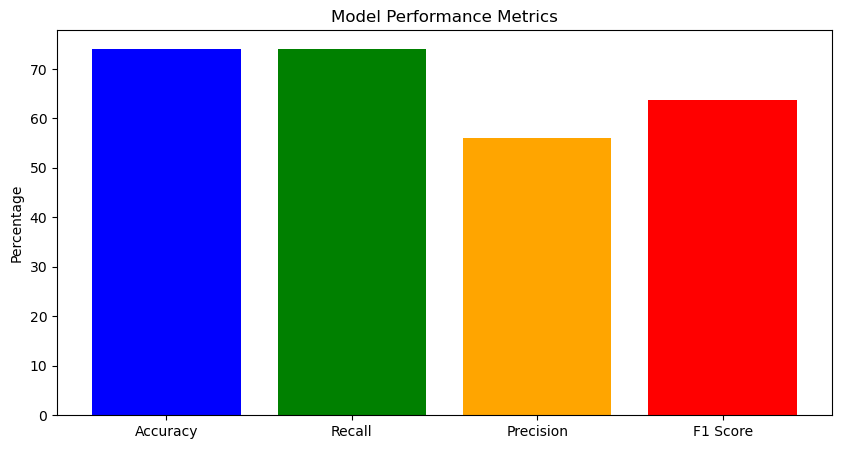

In [29]:
# Plot the metrics
metrics = {'Accuracy': Accuracy_mlp, 'Recall': Recall_mlp, 'Precision': Precision_mlp, 'F1 Score': F1_mlp}
plt.figure(figsize=(10, 5))
plt.bar(metrics.keys(), [v * 100 for v in metrics.values()], color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Percentage')
plt.title('Model Performance Metrics')
plt.show()


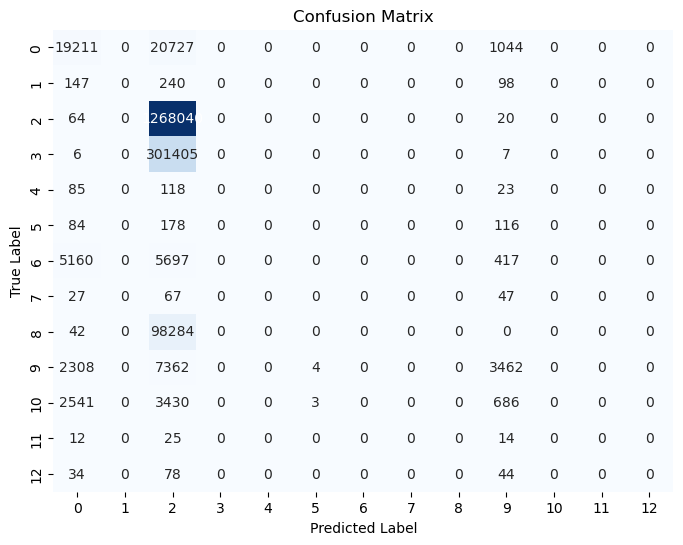

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Save the MLP Model:
dump(mlp_model, 'mlp_sub_model.joblib')

['mlp_sub_model.joblib']